

Gustavo de Leon 17085

Andres Urizar 17632


## MiniProyecto 2

In [51]:
import numpy as np
import matplotlib.pyplot as plt 
import random
from itertools import zip_longest
import math

#### Ejercicio 1

Suponiendo que es simple generar variables aleatorias con función de probabilidad acumulada Fi(x) para i de 1 a n, tenemos V (variable aleatoria) con función de probabilidad acumulada:

#### Ejercicio 2

Escriba un programa tal que, dada una función de masa de probabilidad (pi, para i de 1 a n), proporcione como salida el valor de una variable aleatoria con esta función de masa. Haga un histograma para alguna distribución de ejemplo

#### Ejercicio 3 VPN

Realice tres simulaciones para determinar cuál de los proyectos es el más rentable. Utilice 100, 1000 y 10000 iteraciones

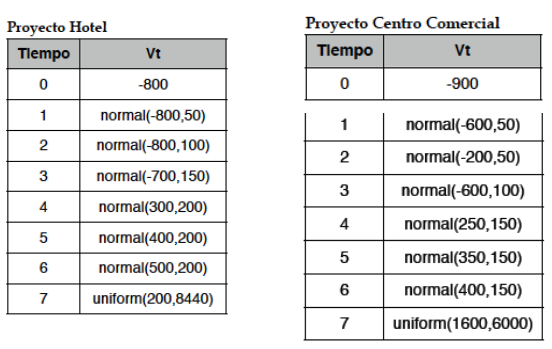

Asignacion de valores de la tabla de tiempo y Vt

In [334]:
def vt(mus,sigmas,uniformal):
    lista = []
    for mu, sigma in zip_longest(mus, sigmas):
        lista.append(np.random.normal(mu, sigma))
    lista.append(np.random.uniform(uniformal[0],uniformal[1]))
    return lista

Formula de VPN

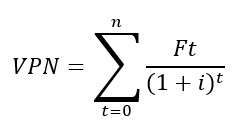

In [335]:
def sumatoria(lista,tas,inicial):
    resp = inicial
    for t in lista:
        resp += t/(1+tas)**(lista.index(t)+1)
    return resp

Iteraciones

In [337]:
def iteraciones(n,media,varianza,uniforme,tasa,inicial):
    fin = []
    for i in range(n):
        valores = vt(media,varianza,uniforme)
        resp = sumatoria(valores,tasa,inicial)
        fin.append(resp)
    final = sum(fin)/len(fin)
    return final

Asignacion de valores Hotel

In [336]:
media = [-800,-800,-700,300,400,500]
varianza = [50,100,150,200,200,200]
uniforme = [200,8440]
tasa = 0.1
inicial = -800

Asignacion de valores Centro Comercial

In [341]:
media2 = [-600,-200,-600,250,350,400]
varianza2 = [50,50,100,150,150,150]
uniforme2 = [1600,6000]
tasa2 = 0.1
inicial2 = -900

##### 100 iteraciones Hotel

In [338]:
final = iteraciones(100,media,varianza,uniforme,tasa,inicial)
final

229.09426490406543

##### 100 iteraciones Centro Comercial

In [342]:
final = iteraciones(100,media2,varianza2,uniforme2,tasa2,inicial2)
final

439.9259374873956

##### 1000 iteraciones Hotel

In [339]:
final = iteraciones(1000,media,varianza,uniforme,tasa,inicial)
final

289.11270945194354

##### 1000 Iteraciones Centro Comercial

In [345]:
final = iteraciones(1000,media2,varianza2,uniforme2,tasa2,inicial2)
final

503.1436224999972

##### 100000 Iteraciones Hotel

In [340]:
final = iteraciones(10000,media,varianza,uniforme,tasa,inicial)
final

260.26754130675187

##### 10000 Iteraciones Centro Comercial

In [346]:
final = iteraciones(10000,media2,varianza2,uniforme2,tasa2,inicial2)
final

493.1586637119846

En cada una de las pruebas con diferentes iteraciones el Proyecto de Centro Comercial tiene mayores valores de VPN por lo que este proyecto es el mejor para invertir.

#### Ejercicio 4

Usted es un voceador que quiere saber si le conviene más comprar diariamente 9, 10 u 11 periódicos. Además, sabe que el 30% de los días le piden 9, el 40% de los días le piden 10 y el 30% de los días le piden 11. Si usted compra los periódicos para luego venderlos,y paga  1.50 por periódico, lo vende a  2.50, y por cada periódico no vendido se le reembolsa  0.50, ¿cuál es la cantidad que más le conviene comprar todos los días? Simule para un mes, un año y diez años.

In [ ]:
ran